# 
- **Answer Set** : NO. 04
- **Full Name** : Fatemeh Karimi Barikarasfi
- **Student Code** : 96413315

QPSK Modulation in Rayleigh Fading Channel

In [1]:
clear;clc;close all;
%% create data
N=10;
data=randi([0,1],1,N);
%% 
fc=2;
T=1/fc;
t=0:.01:.99;
s0=cos(2*pi*fc*t);
s1=cos(2*pi*fc*t+pi/4);
s2=cos(2*pi*fc*t+pi);
s3=cos(2*pi*fc*t+3*pi/4);
data1=[];
for i=1:N;
    if data(i)==0;
        data1=[data1 zeros(1,length(t))];
    else
        data1=[data1 ones(1,length(t))];
    end
end
 
%% transmited signal
x=[];
for i=1:2:N;
    if data(i)==0 && data(i+1)==0;
        x=[x s0];
    end
    if data(i)==0 && data(i+1)==1;
        x=[x s1];
    end
    if data(i)==1 && data(i+1)==0;
        x=[x s2];
    end
    if data(i)==1 && data(i+1)==1;
        x=[x s3];
    end
end

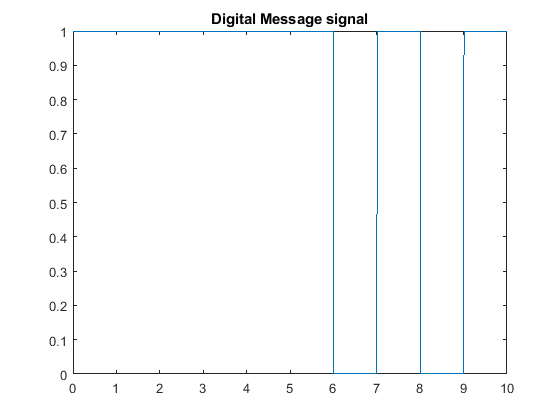

In [2]:
% plot transmited signal
figure()
t1=1:1:length(data1);
plot(t1/100,data1)
%axis([0 1000 0 1.5]);
title('Digital Message signal');

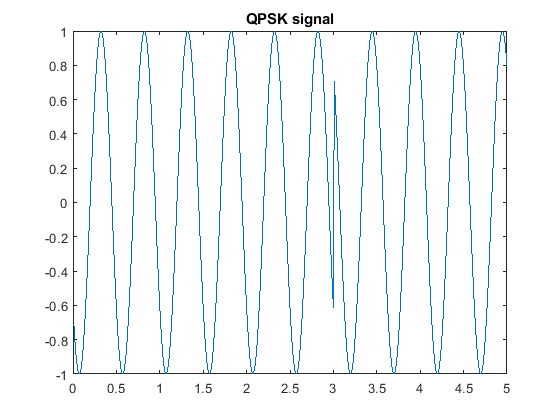

In [4]:
figure()
t2=1:1:length(x);
plot(t2/100,x)
%axis([0 500 -1.5 1.5])
title('QPSK signal');

In [5]:
%% fading chanal
y=[]
snrdb=-1;
snr=10^(snrdb/10);
for i=1:length(x);
    H=sqrt(.5)*( randn(1) + j.*randn(1));
    y=[y sqrt(snr)*abs(H)*x(i)];
end;
%% demodulator
d=[];
for i=1:N/2;
    a=1+100*(i-1);
    b=i*100;
    r=y(a:b);
    r00=r.*s0;
    r0=0;
    for j=1:length(r00);
        r0=r0+r00(i)
    end
    r0=r0/length(r00);
    r01=r.*s1;
    r1=0;
    for j=1:length(r01);
        r1=r1+r01(i)
    end
    r1=r1/length(r00);
    r10=r.*s2;
    r2=0;
    for j=1:length(r10);
        r2=r2+r10(i)
    end
    r2=r2/length(r00);
    r11=r.*s3;
    r3=0;
    for j=1:length(r11);
        r3=r3+r11(i)
    end
    r3=r3/length(r00);
    if (r0>r1 && r0>r2 && r0>r3);
        d=[d 0 0];
    end
    if (r1>r0 && r1>r2 && r1>r3);
        d=[d 0 1];
    end
    if (r2>r0 && r2>r1 && r2>r3);
        d=[d 1 0];
    end
    if (r3>r0 && r3>r1 && r3>r2);
        d=[d 1 1];
    end
end


y =

     []


r0 =

  -40.3546


r0 =

  -80.7092


r0 =

 -121.0639


r0 =

 -161.4185


r0 =

 -201.7731


r0 =

 -242.1277


r0 =

 -282.4824


r0 =

 -322.8370


r0 =

 -363.1916


r0 =

 -403.5462


r0 =

 -443.9008


r0 =

 -484.2555


r0 =

 -524.6101


r0 =

 -564.9647


r0 =

 -605.3193


r0 =

 -645.6740


r0 =

 -686.0286


r0 =

 -726.3832


r0 =

 -766.7378


r0 =

 -807.0925


r0 =

 -847.4471


r0 =

 -887.8017


r0 =

 -928.1563


r0 =

 -968.5109


r0 =

  -1.0089e+03


r0 =

  -1.0492e+03


r0 =

  -1.0896e+03


r0 =

  -1.1299e+03


r0 =

  -1.1703e+03


r0 =

  -1.2106e+03


r0 =

  -1.2510e+03


r0 =

  -1.2913e+03


r0 =

  -1.3317e+03


r0 =

  -1.3721e+03


r0 =

  -1.4124e+03


r0 =

  -1.4528e+03


r0 =

  -1.4931e+03


r0 =

  -1.5335e+03


r0 =

  -1.5738e+03


r0 =

  -1.6142e+03


r0 =

  -1.6545e+03


r0 =

  -1.6949e+03


r0 =

  -1.7352e+03


r0 =

  -1.7756e+03


r0 =

  -1.8160e+03


r0 =

  -1.8563e+03


r0 =

  -1.8967e+03


r0 =

  -1.9370e+03





d1 =

     []




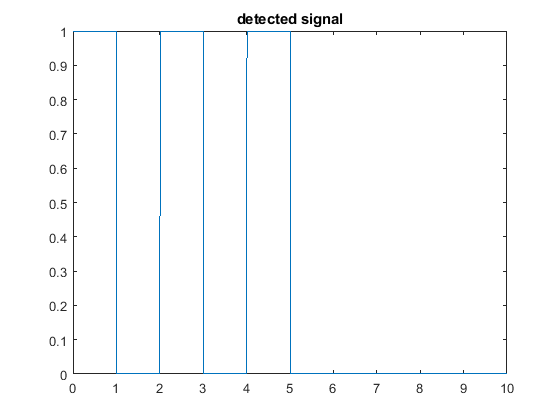

In [6]:
%% detected
d1=[]
for i=1:N;
    if d(i)==0
       d1=[d1 zeros(1,length(t))];
    else
        d1=[d1 ones(1,length(t))];
    end
end
figure()
plot(t1/100,d1)
title('detected signal')
